In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load and merge the necessary data
sale_df = pd.read_csv('Sale.csv')
product_df = pd.read_csv('DimProduct.csv')
inventory_df = pd.read_csv('FactProductInventory.csv')
date_df = pd.read_csv('DimDate.csv')



In [34]:
sale_df

,ProductKey,DateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,310,NaN,NaN,20110105.0,21768.0,1.0,19,6,SO43697,1,...,"2171,2942",NaN,"3578,27","286,2616","89,4568",NaN,NaN,00:00.0,00:00.0,00:00.0
1,346,20101229.0,20110110.0,20110105.0,28389.0,1.0,39,7,SO43698,1,...,"1912,1544","1912,1544","3399,99","271,9992","84,9998",NaN,NaN,00:00.0,00:00.0,00:00.0
2,346,20101229.0,NaN,20110105.0,25863.0,1.0,100,1,SO43699,1,...,"1912,1544","1912,1544","3399,99","271,9992","84,9998",NaN,NaN,00:00.0,00:00.0,00:00.0
3,336,20101229.0,NaN,20110105.0,14501.0,1.0,100,4,SO43700,1,...,"413,1463","413,1463","699,0982","55,9279","17,4775",NaN,NaN,00:00.0,00:00.0,00:00.0
4,346,20101229.0,NaN,20110105.0,11003.0,1.0,6,9,SO43701,1,...,"1912,1544","1912,1544","3399,99","271,9992","84,9998",NaN,NaN,00:00.0,00:00.0,00:00.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60393,485,20140128.0,20140209.0,20140204.0,15868.0,1.0,100,6,SO75122,1,...,"8,2205","8,2205","21,98","1,7584","0,5495",NaN,NaN,00:00.0,00:00.0,00:00.0
60394,225,20140128.0,20140209.0,20140204.0,15868.0,1.0,100,6,SO75122,2,...,"6,9223","6,9223","8,99","0,7192","0,2248",NaN,NaN,00:00.0,00:00.0,00:00.0
60395,485,20140128.0,20140209.0,20140204.0,18759.0,1.0,100,6,SO75123,1,...,"8,2205","8,2205","21,98","1,7584","0,5495",NaN,NaN,00:00.0,00:00.0,00:00.0
60396,486,20140128.0,20140209.0,20140204.0,18759.0,1.0,100,6,SO75123,2,...,"59,466","59,466",159,"12,72","3,975",NaN,NaN,00:00.0,00:00.0,00:00.0


In [35]:
inventory_df

,ProductKey,DateKey,MovementDate,UnitCost,UnitsIn,UnitsOut,UnitsBalance
0,1,20101228,12/28/2010,"0,32",0,0,875
1,1,20101229,12/29/2010,"0,32",0,0,875
2,1,20101230,12/30/2010,"0,32",0,0,875
3,1,20101231,12/31/2010,"0,32",0,0,875
4,1,20110101,1/1/2011,"0,32",0,0,875
...,...,...,...,...,...,...,...
776281,606,20140626,6/26/2014,"233,66",0,0,82
776282,606,20140627,6/27/2014,"233,8",0,0,82
776283,606,20140628,6/28/2014,"233,62",0,0,82
776284,606,20140629,6/29/2014,"233,85",0,0,82


In [36]:

# Merge the dataframes
merged_df = sale_df.merge(product_df, on='ProductKey')
merged_df = merged_df.merge(inventory_df, on=['ProductKey', 'DateKey'])
merged_df = merged_df.merge(date_df, on='DateKey')

# Aggregate the data by category and month
grouped_df = merged_df.groupby(['ProductSubcategoryKey', 'MonthNumberOfYear']).agg({
    'UnitsBalance': 'sum',
    'UnitsOut': 'sum'
}).reset_index()


In [37]:
grouped_df

,ProductSubcategoryKey,MonthNumberOfYear,UnitsBalance,UnitsOut
0,1,1,22101,1009
1,1,2,19866,827
2,1,3,23516,802
3,1,4,24854,586
4,1,5,27592,1763
...,...,...,...,...
199,37,8,488058,10104
200,37,9,461605,10021
201,37,10,544525,12301
202,37,11,510968,10804


Mean Squared Error: 7684320964.63
R-squared: -0.11


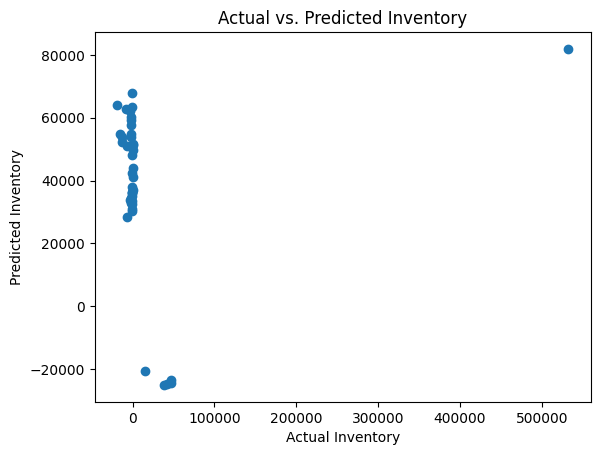

In [38]:
# Calculate the inventory by subtracting UnitsOut from UnitsBalance
grouped_df['Inventory'] = grouped_df['UnitsBalance'] - grouped_df['UnitsOut']

# Prepare the features and target variable
X = grouped_df[['ProductSubcategoryKey', 'MonthNumberOfYear']]
y = grouped_df['Inventory']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Visualize the actual vs. predicted values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Inventory')
plt.ylabel('Predicted Inventory')
plt.title('Actual vs. Predicted Inventory')
plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

In [44]:
X_train

,ProductSubcategoryKey,MonthNumberOfYear
199,37,8
93,23,10
38,19,3
24,3,1
96,25,1
...,...,...
106,25,11
14,2,3
92,23,9
179,31,12


In [45]:
y_train

199    477954
93        -33
38      -4001
24       6672
96         28
        ...  
106        -3
14      45072
92          2
179    -10081
102      -128
Name: Inventory, Length: 163, dtype: int64

Mean Squared Error: 115986535.56
R-squared: 0.98


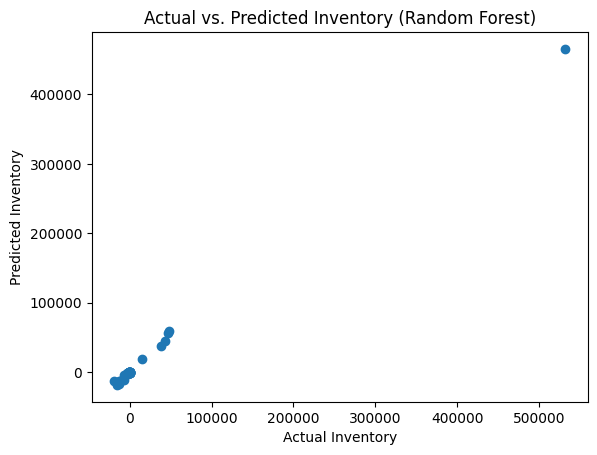

In [40]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Visualize the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Inventory')
plt.ylabel('Predicted Inventory')
plt.title('Actual vs. Predicted Inventory (Random Forest)')
plt.show()

In [41]:
def predict_inventory(product_subcategory, month):
    # Prepare the input data
    input_data = pd.DataFrame({
        'ProductSubcategoryKey': [product_subcategory],
        'MonthNumberOfYear': [month]
    })

    # Make a prediction
    inventory = model.predict(input_data)[0]
    return inventory

# Predict the inventory for a product subcategory and month
product_subcategory = 1
# month = 1
# inventory = predict_inventory(product_subcategory, month)

# print(f"Predicted inventory for product subcategory {product_subcategory} in month {month}: {inventory:.2f}")
# #print actual inventory
# actual_inventory = grouped_df[(grouped_df['ProductSubcategoryKey'] == product_subcategory) & (grouped_df['MonthNumberOfYear'] == month)]['Inventory'].values[0]
# print(f"Actual inventory for product subcategory {product_subcategory} in month {month}: {actual_inventory:.2f}")

month_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
inventory_list = []
for month in month_list:
    inventory = predict_inventory(product_subcategory, month)
    inventory_list.append(int(inventory))

# Create a dataframe to store the results
actual_inventory_list = []
for month in month_list:
    actual_inventory = grouped_df[(grouped_df['ProductSubcategoryKey'] == product_subcategory) & (grouped_df['MonthNumberOfYear'] == month)]['Inventory'].values[0]
    actual_inventory_list.append(actual_inventory)
results_df = pd.DataFrame({
    'MonthNumberOfYear': month_list,
    'PredictedInventory': inventory_list,
    'ActualInventory': actual_inventory_list
})
print("Predict Inventory for Product Subcategory 1:")
results_df

Predict Inventory for Product Subcategory 1:


,MonthNumberOfYear,PredictedInventory,ActualInventory
0,1,20909,21092
1,2,20026,19039
2,3,22087,22714
3,4,24027,24268
4,5,26914,25829
5,6,35718,39529
6,7,33964,32024
7,8,35089,35478
8,9,35921,35786
9,10,37963,38475


In [42]:
importances = model.feature_importances_
features = X.columns
importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
importances_df

,Feature,Importance
0,ProductSubcategoryKey,0.993336
1,MonthNumberOfYear,0.006664


In [28]:
# # Merge additional columns
# merged_df = sale_df.merge(product_df, on='ProductKey')
# merged_df = merged_df.merge(inventory_df, on=['ProductKey', 'DateKey'])
# merged_df = merged_df.merge(date_df, on='DateKey')

# # Aggregate the data by category and month, including additional columns
# grouped_df = merged_df.groupby(['ProductSubcategoryKey', 'MonthNumberOfYear', 'Color', 'Size', 'DaysToManufacture', 'ListPrice', 'CalendarQuarter', 'FiscalQuarter']).agg({
#     'UnitsBalance': 'sum',
#     'UnitsOut': 'sum'
# }).reset_index()

# # Calculate the inventory
# grouped_df['Inventory'] = grouped_df['UnitsBalance'] - grouped_df['UnitsOut']

# # Prepare the features and target variable
# X = grouped_df[['ProductSubcategoryKey', 'MonthNumberOfYear', 'Color', 'Size', 'DaysToManufacture', 'ListPrice', 'CalendarQuarter', 'FiscalQuarter']]
# y = grouped_df['Inventory']

Mean Squared Error: 2005050.86
R-squared: 0.99


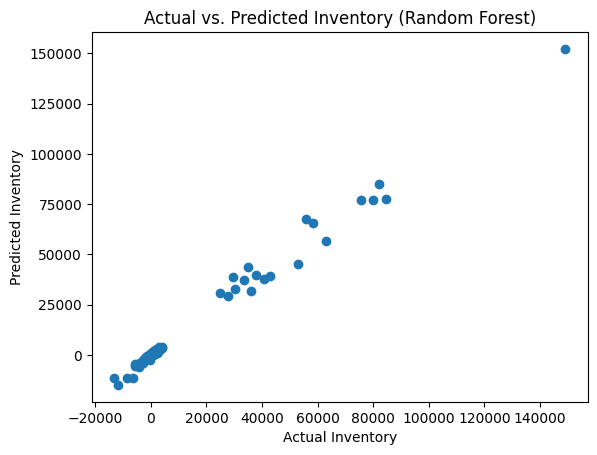

In [29]:


# #convert categorical columns to numerical
# X = pd.get_dummies(X)




# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create and train the Random Forest model
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse:.2f}")
# print(f"R-squared: {r2:.2f}")

# # Visualize the actual vs. predicted values
# plt.scatter(y_test, y_pred)
# plt.xlabel('Actual Inventory')
# plt.ylabel('Predicted Inventory')
# plt.title('Actual vs. Predicted Inventory (Random Forest)')
# plt.show()
